Damit dieses Arbeitsblatt funktioniert, musst du als erstes den folgenden Code ausführen. Klicke dazu auf das Code Feld und drücke auf "Run" (oder drücke Shift + Enter).

In [76]:
# Damit das Arbeitsblatt funktioniert, muss das hier stehen.
include("code/loadfunctions.jl");

Wir stellen fest, dass wir schon hier erneut weitere Strahlen benötigen. Selbst das Hinzufügen von zwei weiteren Strahlen reicht nicht aus, so dass die Lösung dann immernoch nicht eindeutig ist. Es werden noch mehr Informationen benötigt, um die Struktur des Objekts eindeutig bestimmen zu können. 

Das hinzufügen von immer mehr Strahlen soll automatisiert werden, weshalb wir uns im nächsten Schritt überlegen müssen, wie die Strahlen abhängig vom Startpunkt und einem Winkel beschrieben werden können. So kann im Anschluss geschaut werden, dass ausreichend viele Strahlen betrachtet werden, um die Struktur des Objekts eindeutig zu bestimmen.

Lasst den folgenden Code-Teil durchlaufen bevor ihr weiter arbeitet.

In [46]:
# Daten einlesen
x10,x20,N,JJ,nx1,nx2,x11,x21,verschx1,verschx2,a,b,laengenmatrix,theta1,counter = CT.Dateneinlesen(3);

# Verlauf der Strahlen
Schon an dem kleinen Beispiel mit neun Pixeln ist klar geworden, dass man bei steigender Pixelzahl immer mehr Strahlen benötigt. Üblicherweise sind im menschlichen Körper viele verschiedene Materialien vertreten, die alle unterschiedliche Absorptionskoeffizienten besitzen, weshalb das Aufstellen des Gleichungssystems automatisiert werden sollte.

Um diesen Prozess zu automatisieren, müssen wir einen Eindruck davon bekommen, wie ein Strahl, der durch einen Körper verläuft, beschrieben werden kann. Dafür betrachten wir im Folgenden erneut das durch neun Pixel (drei Zeilen, drei Spalten) aufgelöste Objekt, wie es im folgenden Bild zu sehen ist. 

![alternative text](figs/WinkelKoerper52.png)

Für die Automatisierung stehen euch die Startpunkte der Strahlen am Rand des Objekts, also die Punkte in denen die Strahlen in das Objekt eindringen, und die Winkel zu denen das Objekt durchleuchtet wird, zur Verfügung. Lasst den nächsten Codeteil durchlaufen, damit diese Werte erstellt werden und ihr sie euch anschauen könnt. 

In [47]:
# Berechnung der Startpunkte für die angegebenen Daten
theta, PX1, PX2 = CT.Startpunkte(x10,x20,N, JJ,nx1,nx2,x11,x21,verschx1,verschx2,theta1,counter);

Die erstellten Daten sehen wie folgt aus:
$$theta = \begin{pmatrix}0&45&\color{red}{90}&135\end{pmatrix},\qquad\qquad PX1 = \begin{pmatrix}-1.5&-0.59&0.75&1.5\\-1.5&-1.5&\color{red}{-0.25}&1.5\\-1.5&-1.5&-1.25&0.09\end{pmatrix},\qquad\qquad PX2 = \begin{pmatrix}-0.75&-1.5&-1.5&-0.09\\0.25&-1&\color{red}{-1.5}&-1.5\\1.25&0.41&-1.5&-1.5\end{pmatrix}$$

Die Variable **theta** gibt die verschiedenen betrachteten Winkel in Grad an. Zu jeder Winkeleinstellung wird das Objekt von drei parallelen Strahlen durchlaufen. Das heißt, dass wir insgesamt 12 Strahlen betrachten. Die Einträge von PX1 und PX2 geben die $x_1$- bzw. $x_2$-Koordinaten der Startpunkte der Strahlen für die entsprechenden Winkel an. Die rot markierten Zahlen sagen einem also, dass der betrachtete Strahl mit einem Winkel von $90^{\circ}$ in Punkt $(-0.25|-1.5)$ in das Objekt tritt.

Auf die einzelnen Elemente der Tabelle kann zugegriffen werden, indem man sagt in welcher Zeile Z und Spalte S sich das gewünschte Element befindet: **PX1(Z,S)** und **PX2(Z,S)**.

Unser Ziel für die nächsten Aufgabenteile ist es die Matrix, die wir im Aufgabenblatt 1 exemplarisch für die Auflösung des Objekts durch vier und neun Pixel  bestimmt haben, allgemein für eine beliebige Anzahl von parallelen Strahlen und Winkeleinstellungen zu erstellen. Hierfür beschreiben wir die Strahlen als Geraden im  und müssen uns anschließend eine Methode überlegen, wie wir dem Computer mitteilen können in welchem Pixel der Strahl sich wie lange befindet. Mit dieser Matrix können wir anschließend die einzelnen Einträge  ermitteln.

## Schritt 1 | Betrachtung eines Strahls
Im Folgenden betrachten wir exemplarisch einen einzelnen Strahl (siehe die folgende Abbildung) und wollen dessen Verlauf durch die einzelnen Pixel beschreiben.

![alternative text](figs/WinkelKoerper1b2.png)

**a)** Sucht aus der Tabelle der Variablen PX1 und PX2 die Startpunkte **StartPX1** und **StartPX2** für den ersten Strahl mit Winkeleinstellung  raus und gebt diese im folgenden Codeteil ein.

In [48]:
# Überprüfung der ausgewählten Koordinaten des Startpunktes
StartPX1 = PX1[1,2];
StartPX2 = PX2[1,2];

CT.ueberpruefeStartpunkt(StartPX1,StartPX2,PX1,PX2);

Ihr habt die korrekten Koordinaten für den Startpunkt ausgewählt!


**b)** Berechnet mit Hilfe des Startpunktes des ersten Strahles die Schnittpunkte mit den ersten beiden Pixelkanten. Gebt diese zur Überprüfung, auf mindestens zwei Nachkommastellen genau, in MATLAB ein. Beginnt dabei mit dem am Startpunkt nächsten liegenden Schnittpunkt. Als Hilfestellung könnt ihr das obige Bild verwenden, da dieses den Strahl zeigt dessen Schnittpunkte ihr bestimmen müsst. ($\bigstar$ Blatt)

*Hinweis:* Zu dieser Aufgabe könnt ihr euch bei Bedarf Hilfekarten 5 und 6 anschauen.

In [49]:
# Überprüfung der berechneten Schnittpunkte gerundet auf 2 Nachkommastellen
ersterSPX1 = -0.5;
ersterSPX2 = -1.41;
zweiterSPX1 = 0.41;
zweiterSPX2 = -0.5;

# Eingabe wird überprüft
CT.ueberpruefeberechneteSchnittpunkte(ersterSPX1,ersterSPX2,zweiterSPX1,zweiterSPX2,x10,x20,N, JJ,nx1,nx2,x11,x21,theta[2],PX1[1,2],PX2[1,2])

Ihr habt den ersten Schnittpunkt korrekt berechnet!
Ihr habt den zweiten Schnittpunkt korrekt berechnet!


**c)** Angenommen wir hätten schon eine allgemeine Schreibweise für die Strahlen. Gebt an, welche Werte für $x_1$ und $x_2$ in diese Formel zur Schnittpunktberechnung eingesetzt werden müssen, damit alle Schnittpunkte der Strahlen mit den Pixelkanten berechnet werden. Auf diese könnt ihr im weiteren Verlauf durch **X1(k)** und **X2(k)** zugreifen.

In [50]:
# Pixelkanten
X1 = [-1.5 -0.5 0.5 1.5];
X2 = [-1.5 -0.5 0.5 1.5];

CT.ueberpruefePixelkanten(X1,X2)

Ihr habt die Pixelkanten korrekt gewählt!


**d)** Betrachtet erneut eure Rechnungen aus b). Diese sollen in den nächsten Schritten automatisiert werden. Hierfür müssen die Strahlen zunächst einmal durch Geraden im $\mathbb{R}^2$ beschrieben werden. Hierfür verwenden wir die Parameterdarstellung $g:\vec{x}=\vec{p}+t\cdot \vec{v}$.

* Überlegt euch einen Grund, warum wir nicht die Geradengleichung $g(x) = m\cdot x+n$ verwenden können. ($\bigstar$ Blatt)

* Stellt zunächst einmal die allgemeine Parameterdarstellung für die Strahlen auf. Bei der Parameterdarstellung müsst ihr die Formeln der ersten und zweiten Koordinate getrennt eingeben.

   *Hinweis:* Zu dieser Aufgabe könnt ihr euch bei Bedarf Hilfekarten 7 und 8 anschauen.

In [51]:
# Parameterdarstellung der Strahlen
ParameterdarstellungX1(t,Z,S) = PX1[Z,S]+t*cosd(theta[S]);
ParameterdarstellungX2(t,Z,S) = PX2[Z,S]+t*sind(theta[S]);

CT.ueberpruefePara(PX1,PX2,theta,a,b,ParameterdarstellungX1,ParameterdarstellungX2);

Eure Parameterdarstellung für die Strahlen ist korrekt!


* Nun muss auch die Berechnung der Schnittpunkte dieser Geraden mit den Pixelkanten automatisiert werden. Das bedeutet, dass mit der Angabe des Startpunkts durch PX1(Z,S) und PX2(Z,S), der Winkeleinstellung theta(S) und den  zuvor bestimmten $x_1$- und $x_2$-Werten X1(k) und X2(k) die Schnittpunkte eines Strahls mit den Pixelkanten berechnet werden müssen.

VX1 ist die X1-Koordinate des Schnittpunkts mit der vertikalen Pixelkante, VX2 die dazugehörige X2-Koordinate. HX1 und HX2 stellen das entsprechende für die horizontalen Pixelkanten dar.    

Ihr habt die Schnittpunkte mit den Pixelkanten korrekt berechnet!

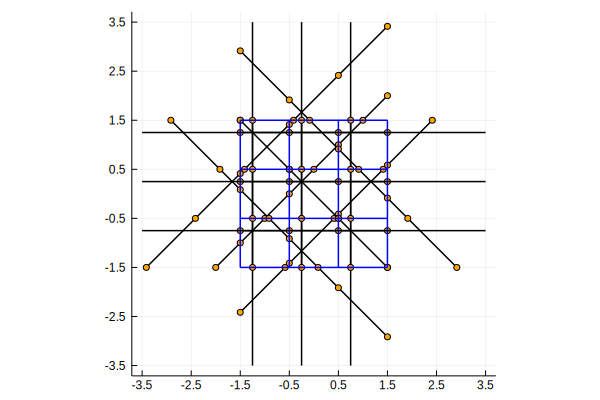

In [52]:
# Berechnung der Schnittpunkte mit Pixelkanten durch die Parameterdarstellung
# Schnittpunkt mit vertikalen Pixelkanten
VX1(k) = X1[k];
VX2(k,Z,S) = PX2[Z,S]+(X1[k]-PX1[Z,S])/cosd(theta[S])*sind(theta[S]);

# Schnittpunkt mit horizontalen Pixelkanten
HX1(k,Z,S) = PX1[Z,S]+(X2[k]-PX2[Z,S])/sind(theta[S])*cosd(theta[S]);
HX2(k) = X2[k];

SPX1, SPX2, Plot= CT.berechneallgemeineSchnittpunkte(PX1,PX2,theta,ParameterdarstellungX1,ParameterdarstellungX2,a,b,X1,X2,N,JJ,VX1,VX2,HX1,HX2,counter);
display(Plot)

**e)** Füllt diesen Lückentext mit den richtigen Werten und gebt anschließend eure Werte für a und b zur Überprüfung in MATLAB ein. Notiert euch, was das für unser Modell heißt und was verändert werden muss. ($\bigstar$ Blatt)


|Betrachtet man die berechneten Schnittpunkte, fällt auf, dass für den weiteren Verlauf nur die $x_1$- und $x_2$-Werte zwischen a und b wichtig sind.|
---

Ihr habt den Lückentext korrekt ausgefüllt!
SPX1: 8×12 Array{Float64,2}:
 -1.5  -1.5  -1.5  -1.5     -2.0  -3.4142  0.75  -0.25  -1.25   2.9142   1.5   1.5   
 -0.5  -0.5  -0.5  -0.5858  -1.5  -2.4142  0.75  -0.25  -1.25   1.9142   0.5   0.5   
  0.5   0.5   0.5  -0.5     -1.0  -1.5     0.75  -0.25  -1.25   1.5     -0.5   0.0858
  1.5   1.5   1.5   0.4142  -0.5  -1.4142  0.75  -0.25  -1.25   0.9142  -1.5  -0.5   
  0.0   0.0   0.0   0.5      0.0  -0.5     0.0    0.0    0.0    0.5      0.0  -0.9142
  0.0   0.0   0.0   1.4142   0.5  -0.4142  0.0    0.0    0.0   -0.0858   0.0  -1.5   
  0.0   0.0   0.0   1.5      1.0   0.5     0.0    0.0    0.0   -0.5      0.0  -1.9142
  0.0   0.0   0.0   2.4142   1.5   1.5     0.0    0.0    0.0   -1.5      0.0  -2.9142

 SPX2: 8×12 Array{Float64,2}:
 -0.75  0.25  1.25  -2.4142  -1.5  -1.5     -1.5  -1.5  -1.5  -1.5     -1.5  -2.9142
 -0.75  0.25  1.25  -1.5     -1.0  -0.5     -0.5  -0.5  -0.5  -0.5     -0.5  -1.9142
 -0.75  0.25  1.25  -1.4142  -0.5   0.

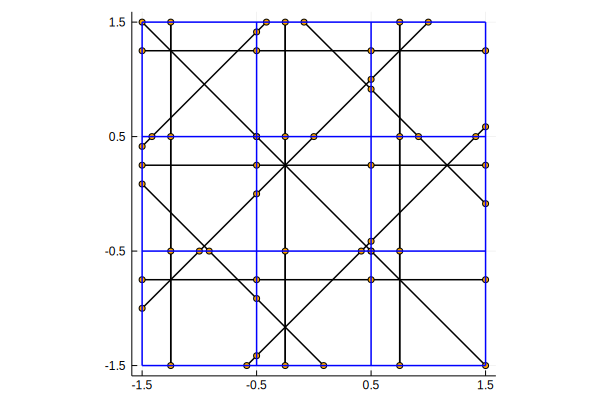

In [53]:
# Lückentext
a = -1.5;
b = 1.5;

SPX1, SPX2 = CT.ueberpruefeaundb(PX1,PX2,theta,ParameterdarstellungX1,ParameterdarstellungX2,a,b,X1,X2,N,JJ,VX1,VX2,HX1,HX2,SPX1,SPX2);

Die ausgegebenen Daten **SPX1** und **SPX2** bezeichnen die $x_1$- und $x_2$-Koordinaten der Schnittpunkte der Strahlen mit den Pixelkanten ausgehend vom Startpunkt, wobei jede Spalte für einen Strahl und dessen Schnittpunkte steht. Die Strahlen einer Winkeleinstellung folgen nacheinander, somit sind die ersten drei Strahlen die für $\theta = 0^{\circ}$. Die Reihenfolge der Strahlen bei jeder Winkeleinstellung entspricht der in PX1 gespeicherten Reihenfolge, angefangen von oben. 

Dieses gewonnene Wissen wollen wir nun verwenden, um die gesuchte Matrix  aufzustellen. Jede ihrer Zeilen steht für einen Strahl und die Werte in den Spalten  geben an, welche Strecke der entsprechende Strahl in einem Pixel zurücklegt. So beschreibt der Eintrag der dritten Zeile und fünften Spalte, dass der dritte Strahl in Pixel fünf die entsprechende Strecke zurücklegt, welches durch das folgende Bild beschrieben wird.

Das Zeichen * bedeutet, dass der Eintrag ungleich Null sein kann.

![alternative text](figs/WinkelKoerper4b2.png)

Im nächsten Schritt ist das Ziel diese Matrix zunächst exemplarisch und danach allgemein aufzustellen. 

## Schritt 2 | Allgemeine Betrachtung
Die Position, also die Pixelnummer, an die eine zurückgelegte Strecke geschrieben werden muss, kann mit Hilfe des Abstands zwischen dem Mittelpunkt zweier Schnittpunkte und dem Mittelpunkt eines Pixels bestimmt werden, wie es die folgende Abbildung zeigt. Dies nutzen wir in den nächsten Aufgabenteilen aus und beschreiben dieses Vorgehen durch Formeln.

![alternative text](figs/Vorgehen52.png)

**a)** Erstellt zunächst einmal zur Veranschaulichung, zu dem in **Schritt 1 a)** betrachteten Strahl, die entsprechende Zeile der Matrix, welche die Längenabschnitte pro Pixel enthält. Beachtet dabei die korrekte Pixelnummerierung. Gebt diese Zeile auf mindestens zwei Nachkommastellen genau im folgenden Code-Teil ein.

In [55]:
# Zeile der Matrix

MatrixZeile = [0 0 0.13 0 0.13 1.29 0.13 1.29 0];

CT.ueberpruefeZeile(MatrixZeile)

Eure Bestimmung der Zeile ist korrekt!


**b)** Gebt die Koordinaten der Pixelmittelpunkte der dazugehörigen Pixelzahl in MATLAB ein.

Eure Pixelmittelpunkte sind korrekt!


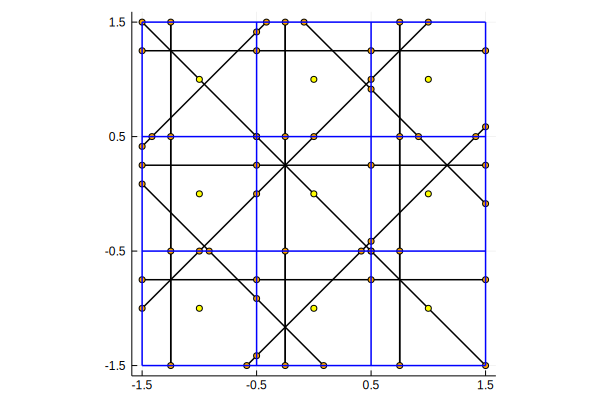

In [58]:
# Pixelmittelpunkte und Pixelzahlen

Pixelmitten = [1 -1 1;
               2 -1 0;
               3 -1 -1;
               4 0 1;
               5 0 0;
               6 0 -1;
               7 1 1;
               8 1 0;
               9 1 -1];
   
CT.ueberpruefePixel(Pixelmitten,PX1,PX2,theta,ParameterdarstellungX1,ParameterdarstellungX2,a,b,X1,X2,N,JJ,VX1,VX2,HX1,HX2,x10,x11,x20,x21,nx1,nx2)

**c)** Stellt eine allgemeine Formel für die Berechnung des Abstands zwischen zwei benachbarten Schnittpunkten eines Strahles auf. Überlegt euch, was ihr in den Aufgabenteilen von Aufgabe 1 bereits berechnet habt, das euch helfen könnte.

*Hinweis:* Zu dieser Aufgabe könnt ihr euch bei Bedarf Hilfekart 9 anschauen.

In [59]:
# Berechnung des Abstands zwei Schnittpunkten
Abstandfkt(Z,S) = sqrt((SPX1[Z+1,S]-SPX1[Z,S])^2+(SPX2[Z+1,S]-SPX2[Z,S])^2);

Abstand = CT.ueberpruefeAbstand(SPX1,SPX2,Abstandfkt,a,b);

Eure verallgemeinerte Berechnung für den Abstand ist korrekt!
Abstand: 5×12 Array{Float64,2}:
 1.0  1.0  1.0  0.12134  0.707107  0.12134  1.0  1.0  1.0  0.828446  1.41421  0.828446
 1.0  1.0  1.0  1.29287  0.707107  1.29287  1.0  1.0  1.0  0.585767  1.41421  0.585767
 1.0  1.0  1.0  0.12134  0.707107  0.12134  1.0  1.0  1.0  0.828446  1.41421  0.828446
 0.0  0.0  0.0  1.29287  0.707107  0.0      0.0  0.0  0.0  0.0       0.0      0.0     
 0.0  0.0  0.0  0.12134  0.707107  0.0      0.0  0.0  0.0  0.0       0.0      0.0     

**d)** Stellt eine allgemeine Formel für die Berechnung der $x_1$- und $x_2$-Koordinate des Mittelpunkts zwischen zwei Schnittpunkten auf.

MPX1: 5×12 Array{Float64,2}:
 -1.0  -1.0  -1.0  -0.5429  -1.25  -1.4571  0.75  -0.25  -1.25  1.2071   1.0  -0.2071
  0.0   0.0   0.0  -0.0429  -0.75  -0.9571  0.75  -0.25  -1.25  0.7071   0.0  -0.7071
  1.0   1.0   1.0   0.4571  -0.25  -0.4571  0.75  -0.25  -1.25  0.2071  -1.0  -1.2071
  0.0   0.0   0.0   0.9571   0.25   0.0     0.0    0.0    0.0   0.0      0.0   0.0   
  0.0   0.0   0.0   1.4571   0.75   0.0     0.0    0.0    0.0   0.0      0.0   0.0   

 MPX2: 5×12 Array{Float64,2}:
 -0.75  0.25  1.25  -1.4571  -0.75  0.4571  -1.0  -1.0  -1.0  0.2071  -1.0  -1.2071
 -0.75  0.25  1.25  -0.9571  -0.25  0.9571   0.0   0.0   0.0  0.7071   0.0  -0.7071
 -0.75  0.25  1.25  -0.4571   0.25  1.4571   1.0   1.0   1.0  1.2071   1.0  -0.2071
  0.0   0.0   0.0    0.0429   0.75  0.0      0.0   0.0   0.0  0.0      0.0   0.0   
  0.0   0.0   0.0    0.5429   1.25  0.0      0.0   0.0   0.0  0.0      0.0   0.0   

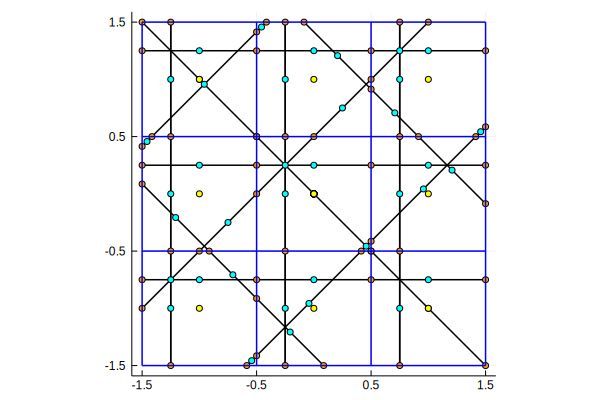

In [61]:
# Berechnung des Mittelpunkts zwischen zwei Schnittpunkten
MX1(Z,S) = SPX1[Z,S]+Abstand[Z,S]/2*cosd(theta[S]);
MX2(Z,S) = SPX2[Z,S]+Abstand[Z,S]/2*sind(theta[S]);

MPX1, MPX2 = CT.ueberpruefeMittelpunkte(PX1,PX2,theta,ParameterdarstellungX1,ParameterdarstellungX2,a,b,X1,X2,N,JJ,VX1,VX2,HX1,HX2,Abstand,MX1,MX2,nx1,nx2,Pixelmitten);

**e)** Schaut euch das zuletzt ausgegebene Bild an und beschreibt, wie die bestimmten Mittelpunkte zwischen zwei Schnittpunkten verwendet werden können, um zu sagen in welchem Pixel sich der Strahl beim betrachteten Stück befindet. ($\bigstar$ Blatt)

**f)** Lasst den folgenden Code-Teil durchlaufen.

In [77]:
# Länge-Pixel-Zuordnung
PixelNummer = CT.bestimmePixelnummer(MPX1,MPX2,Pixelmitten);

Pixelnummer: 5×12 Array{Int64,2}:
 3  2  1  3  3  2  9  6  3  8  9  6
 6  5  4  6  2  1  8  5  2  7  5  3
 9  8  7  5  5  4  7  4  1  4  1  2
 0  0  0  8  4  0  0  0  0  0  0  0
 0  0  0  7  7  0  0  0  0  0  0  0

Die ausgegebene Matrix beschreibt, welche Pixel die Strahlen durchlaufen. Mit Hilfe der Informationen aus der Matrix können Sätze, wie der folgende, formuliert werden: ($\bigstar$ Blatt)
|Der sechste Strahl startet in Pixel 2, geht über in Pixel 1 und verlässt das Objekt nach Pixel 4.|
---

Fertigt selbst noch zwei weitere solcher Sätze an und gebt die Strahlennummer und die Pixel, die durchlaufen werden, nacheinander hier an. Durchläuft der Strahl nicht durch fünf sondern weniger Pixel, so schreibt an die Stellen eine Null.

In [78]:
# Bedeutung der Matrixeinträge
Strahl = 6; #Zum Beispiel Strahl 6
ersterPixel = 2;
zweiterPixel = 1;
sritterPixel = 4;
vierterPixel = 0;
fuenfterPixel = 0;

CT.ueberpruefePixelStrahl(PixelNummer,Strahl, ersterPixel,zweiterPixel, sritterPixel, vierterPixel, fuenfterPixel);

Ihr habt korrekt erkannt durch welche Pixel der Strahl läuft!


**g)** Mit diesem wissen kann nun die Matrix  erstellt werden.

In [79]:
# Matrix A erstellen
A = CT.erstelleMatrix(Abstand,PixelNummer,nx1,nx2);

A: 12×9 Array{Float64,2}:
 0.0      0.0       1.0       0.0       0.0       1.0       0.0       0.0       1.0    
 0.0      1.0       0.0       0.0       1.0       0.0       0.0       1.0       0.0    
 1.0      0.0       0.0       1.0       0.0       0.0       1.0       0.0       0.0    
 0.0      0.0       0.12134   0.0       0.12134   1.29287   0.12134   1.29287   0.0    
 0.0      0.707107  0.707107  0.707107  0.707107  0.0       0.707107  0.0       0.0    
 1.29287  0.12134   0.0       0.12134   0.0       0.0       0.0       0.0       0.0    
 0.0      0.0       0.0       0.0       0.0       0.0       1.0       1.0       1.0    
 0.0      0.0       0.0       1.0       1.0       1.0       0.0       0.0       0.0    
 1.0      1.0       1.0       0.0       0.0       0.0       0.0       0.0       0.0    
 0.0      0.0       0.0       0.828446  0.0       0.0       0.585767  0.828446  0.0    
 1.41421  0.0       0.0       0.0       1.41421   0.0       0.0       0.0       1.41421
 0.0  

Interpretiert diese Matrix in Bezug auf den Verlauf der Strahlen, indem ihr den folgenden Satz vervollständigt: ($\bigstar$ Blatt)

|Die Einträge in den $Wort1$ der Matrix beschreiben, die Längen, die ein Strahl in jedem Pixel zurück legt. Die $Wort2$ hingegen beschreiben, welche Strahlen welche Länge in einem Pixel zurücklegen.|
---

In [80]:
# Satzvervollständigung
Wort1 = "Zeilen";
Wort2 = "Spalten";

CT.ueberpruefeSatzvervollstaendigung1(Wort1,Wort2);

Eure Antwort für Wort1 und Wort2 sind beide korrekt!


Beschreibt im folgenden entweder die Bedeutung der einzelnen Einträge einer Zeile oder einer Spalte:

### Zeile:
Beschreibt die Bedeutung der einzelnen Einträge einer Zeile. ($\bigstar$ Blatt) Gebt dafür die Strahlnummer und die entsprechenden Längen, die der Strahl in den Pixeln verbringt, an. Laenge1 beschreibt die Länge, die der Strahl im ersten Pixel mit Absorptionskoeffizient $f_1$ verbringt, Laenge2 die im zweiten und so weiter.

In [81]:
# Bedeutung einer Zeile
Strahl = 6; #Zum Beispiel Strahl 2
Laenge1 = 1.3;
Laenge2 = 0.1;
Laenge3 = 0;
Laenge4 = 0.1;
Laenge5 = 0;
Laenge6 = 0;
Laenge7 = 0;
Laenge8 = 0;
Laenge9 = 0;

CT.ueberpruefeLaengeStrahl(A,Strahl, Laenge1, Laenge2, Laenge3,Laenge4, Laenge5, Laenge6,Laenge7,Laenge8,Laenge9);

Ihr habt die Zeile der Matrix korrekt interpretiert.


### Spalte:
Beschreibt die Bedeutung der einzelnen Einträge einer Spalte. ($\bigstar$ Blatt) Gebt dafür die Pixelnummer und die entsprechenden Längen, die die Strahlen in dem Pixel verbringen, an. Laenge1 beschreibt die Länge, die der Strahl im Pixel verbringt, Laenge2 die vom zweiten und so weiter.

In [82]:
# Bedeutung einer Spalte
Pixel = 6; #Zum Beispiel Pixel 7
Laenge1 = 1;
Laenge2 = 0;
Laenge3 = 0;
Laenge4 = 1.29;
Laenge5 = 0;
Laenge6 = 0;
Laenge7 = 0;
Laenge8 = 1;
Laenge9 = 0;
Laenge10 = 0;
Laenge11 = 0;
Laenge12 = 0.83;

CT.ueberpruefeLaengePixel(A,Pixel, Laenge1, Laenge2, Laenge3,Laenge4, Laenge5, Laenge6,Laenge7,Laenge8,Laenge9,Laenge10,Laenge11,Laenge12);

Ihr habt die Spalte der Matrix korrekt interpretiert.


Macht hier weiter, wenn ihr früher fertig seid, als die anderen!

# Zusatzaufgabe zur Erstellung der Matrix
Am Ende vom Aufgabenblatt 2 wurde die Matrix $A$ erstellt. In diesem Zusatzblatt sollt ihr euch selbst Gedanken dazu machen, wie der Code aussehen könnte, der dafür sorgt, dass die korrekten Werte an die richtigen Stellen in der Matrix geschrieben werden.

Schaut euch zunächst noch einmal an, welche Variablen bis zu **AB 2 Schritt 2 f)** bereits bestimmt wurden und welche Einträge, welche Bedeutungen haben.

Überlegt euch anschließend, wie durch die bereits bestimmten und vorliegenden Variablen die Stelle in der Matrix und dessen zugehöriger Matrixeintrag bestimmt werden können.

In [25]:
# Matrix A erstellen

Stelle(Z,S) = PixelNummer[Z,S];
Matrixeintrag(Z,S) = Abstand[Z,S];

A = CT.ueberpruefeMatrix(Stelle,Matrixeintrag,PixelNummer,Abstand);

Eure Formel für die Stelle an die der Wert geschrieben ist, ist korrekt.
